<a href="https://colab.research.google.com/github/jcromo-tec/TC5035.10-proyecto-integrador-equipo-37/blob/main/semana-04-avance-02/Avance2_Equipo37_JH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

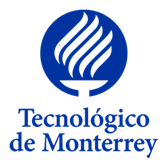

## Proyecto Integrador
## Smart Travel Assistant: Optimizando la Experiencia de Viaje con IA

### Equipo 37
##### A00759664 - Joel Orlando Hernández Ramos
##### A01793486 - Juan Carlos Alvarado Carricarte
##### A00260430 - Juan Carlos Romo Cárdenas


## **Descripción del Proyecto**

Este proyecto se propone desarrollar un asistente de inteligencia artificial integrado en una plataforma de traveltech, que facilita la elección personalizada de hoteles y destinos para los usuarios. Utilizando la función "knowledge base" de Amazon Bedrock, el sistema integrará una extensa base de datos con información detallada sobre más de 2 millones de hoteles. Para este efecto  

El objetivo principal de este proyecto es transformar la experiencia de planificación de viajes, haciendo que sea más intuitiva, personalizada y respaldada por datos. Las metas específicas incluyen mejorar la satisfacción del cliente mediante recomendaciones precisas y personalizadas, reducir el tiempo necesario para planificar un viaje y aumentar la eficiencia del proceso de selección de destinos y hoteles.

El asistente empleará modelos avanzados de sistemas de recomendación, potenciados por un modelo de lenguaje de aprendizaje profundo (LLM), para sugerir itinerarios personalizados y ofrecer asistencia general en la planificación de viajes. Las recomendaciones incluirán referencias detalladas a los hoteles disponibles en nuestra base de datos, asegurando que los usuarios reciban opciones que no solo se ajustan a sus preferencias personales, sino que también maximizan la calidad y la relevancia de la información proporcionada.

## **Cargando Conjunto de Datos Limpios**

En el Avance 1, se llevó acabo una limpieza y análisis exploratorio de los datos. En este sentido, la base de datos resultante fue exportada en formato .csv. Dicho archivo será utilizado en el Avance 2 para comenzar con la ingeniería de datos.

In [ ]:
# Importando librerias requeridas
import pandas as pd
import numpy as np
import pandas as pd
import os
import json
from google.colab import drive



In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataframe_analysis = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Proyecto Integrador/SEMANA 04/df_clean.csv')

In [ ]:
dataframe_analysis.head()

,HotelCode,HotelName,CountryCode,Longitude,Latitude,HotelRating,DescLength,Description,CityName
0,1688289,villa alun,101.0,115.148258,-8.672673,4.0,2325,HeadLine : In Seminyak (Batubelig)Location : W...,Seminyak
1,1863020,house of ahasna,130.0,79.864820,7.182650,3.0,732,"Located in Katunayaka, House Of Ahasna feature...",Katunayaka
2,5414820,casa vacanze margherita,110.0,9.680900,40.360940,0.0,898,Casa Vacanze Margherita is a detached holiday ...,Orosei
3,5758326,casa bethel,91.0,-90.379270,15.469350,0.0,480,"Located in Cobán, in a building dating from 20...",Coban
4,1116957,pension abc,57.0,13.365430,52.499470,3.0,1662,This quietly located guest house in Berlin off...,Berlin


In [ ]:
#Corroboramos el tamaño de nuestro DataFrame para tenerlo como referencia.
dataframe_analysis.shape

(1066257, 9)

## **Ingenería de Datos**



La ingeniería de datos es una proceso de la ciencia de datos dedicado al diseño, desarrollo y mantienenimiento de los sistemas que procesan grandes volúmenes de datos. El objetivo es asegurar que sean útiles y accesibles para análisis, reportes, y aplicaciones de inteligencia artificial. Esta especialidad juega un papel fundamental en el tratamiento de grandes volúmenes de datos, garantizando que sean gestionados, almacenados y transformados de manera efectiva y eficiente. En el caso particular de este proyecto, y cómo ya se menciono anteriormente,  la primera tarea de recopilación y limpieza de datos, que implica la eliminación de incoherencias, duplicados, o información irrelevante de la base de datos de hoteles ya se llevó acabo.

En este Avance 2, se llevará a cabo la transformación de estos datos limpios en una estructura que sea apta para su uso en aplicaciones analíticas y de recomendación, a través de procesos conocidos como transformación y carga (ETL). Este paso es crucial porque transforma los datos crudos en un formato que es más adecuado para el análisis y para alimentar algoritmos de machine learning. En el caso específico de este proyecto, se menciona la creación de dos tipos de archivos por cada hotel: uno conteniendo la descripción del hotel y otro sus metadatos relevantes. Esta estructuración facilita el empleo de técnicas como RAG (Retriever-Answer Generator) en el sistema de recomendación, permitiendo que el algoritmo recupere y utilice la información de manera más eficiente.

La implementación de estos procesos no solo asegura la utilidad de los datos para los propósitos inmediatos del proyecto, sino que también mejora la eficiencia del sistema. Por ejemplo, mediante la optimización de la base de datos y la automatización de los flujos de trabajo de datos, se puede reducir significativamente el tiempo necesario para procesar consultas y generar recomendaciones. Esto, a su vez, mejora la experiencia del usuario al proporcionar respuestas rápidas y personalizadas.

In [ ]:
# Asegurarse de que los directorios para guardar los archivos existan
output_dir = '/content/drive/My Drive/Colab Notebooks/Proyecto Integrador/SEMANA 04/Output/'
os.makedirs(output_dir + 'descripciones', exist_ok=True)
os.makedirs(output_dir + 'metadatos', exist_ok=True)

In [ ]:
# Procesar cada fila en el DataFrame
for index, row in dataframe_analysis.iterrows():
    # Identificamos la columna que contiene el código único de cada hotel
    base_filename = f"hotel_{row['HotelCode']}"

    #Separamos las descripciones
    descripcion_path = f'{output_dir}descripciones/{base_filename}.txt'
    with open(descripcion_path, 'w') as file:
        file.write(row['Description'])

    #Se crea los archivos de metadatos
    metadata_path = f'{output_dir}metadatos/{base_filename}.json'
    metadata = {
        'hotel_id': row['HotelCode'],
        'nombre': row['HotelName'],
        'ciudad': row['CityName'],
        'código_país': row['CountryCode'],
        'rating': row['HotelRating'],
    }
    with open(metadata_path, 'w') as file:
        json.dump(metadata, file)

print("La Totalidad de los metadatos se creó exitosamente")

Una vez creado un archivo de metadatos y otro de texto con las descripciones, es necesario hacer un proceso de generación de embeddings para cada descripción. Estos embeddings son representaciones vectoriales de las descripciones de texto que permitirán al sistema RAG (Retriever-Answer Generator) recuperar eficientemente la información relevante.

En este caso en específico se optó por trabajar con los modelos transformadores pre-entrenados  de Huggin Face, empresa lider en modelos de NLP.

In [ ]:
!pip install transformers sentence-transformers
from sentence_transformers import SentenceTransformer

Cómo se puede observar Hugging Face tiene un método diseñado específicamente para el propósito de generar embeddings de texto. En este caso es importante remarcar que se optó por utilizar especificamente el modelo 'all-MiniLM-L6-v2' por las siguientes razones:

1. **Eficiencia:** El modelo MiniLM se centra en ser pequeño y rápido sin sacrificar demasiado la precisión. Tiene menos parámetros comparado con modelos más grandes como BERT o RoBERTa, lo que lo hace más rápido en tiempo de inferencia y menos demandante en términos de recursos computacionales. Esto es especialmente útil cuando se trabaja en entornos con recursos limitados o cuando se necesitan respuestas en tiempo real.
2. **Calidad de los Embeddings:** A pesar de su tamaño reducido, MiniLM ha sido entrenado y optimizado para mantener una alta calidad en los embeddings que genera. Utiliza técnicas de destilación de conocimiento, donde un modelo más grande y más potente enseña al modelo más pequeño (MiniLM) a replicar su comportamiento. Esto permite que MiniLM alcance una calidad de representación cercana a la de modelos más grandes.
3. **Buen Balance entre Rendimiento y Recursos:** Proporciona un excelente equilibrio entre consumo de recursos y calidad de resultados, permitiendo desplegar un sistema potente incluso en infraestructuras limitadas.

Además es importante mencinonar que este transformer ya incluye dentro de su pipeline la tokenización del texto. Cuando se pasa un texto por método .encode() del modelo, internamente realiza varios pasos entre ellos:

* **Tokenización:** El texto es dividido en tokens según el tokenizador específico del modelo. Este paso convierte el texto en un formato que el modelo puede entender, generalmente transformándolo en una secuencia de IDs de tokens.
* **Embedding de Tokens:** Cada token es convertido en un vector en un espacio de alta dimensionalidad. Esto se hace utilizando la matriz de embedding del modelo.

**Adicional a esto también es importante recalcar que durante el Acance 1 se hicieron procesos de limpieza a esta columna en específico. Por ejemplo, se descartaron entradas que no tuvieran una descripción relevante (mayor a 121 caractérest). Además se eliminaron los tags de HTML por medio de Regex.**



In [ ]:
# Directorio donde se encuentran las descripciones
descripcion_dir = '/content/drive/My Drive/Colab Notebooks/Proyecto Integrador/SEMANA 04/Output/descripciones'


In [ ]:
# Cargando el modelo de sentence transformers
model = SentenceTransformer('all-MiniLM-L6-v2')

embeddings = {}


for filename in os.listdir(descripcion_dir):
    if filename.endswith(".txt"):
        file_path = os.path.join(descripcion_dir, filename)
        with open(file_path, 'r') as file:
            description_text = file.read()
            # Generamos el embedding
            embedding = model.encode(description_text, convert_to_tensor=True)
            # Se almacena en el diccionario
            embeddings[filename] = embedding.numpy()  # Convertir a numpy array para almacenamiento

np.save('/content/drive/My Drive/Colab Notebooks/Proyecto Integrador/SEMANA 04/Output/embeddings.npy', embeddings)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


## **Conclusiones**


## **Referencias**
